In [16]:
import os
import pandas as pd
import numpy as np
import re

# Paths y archivos
DATA_PATH = r'C:/Users/Lenovo/Documents/github/seguimiento-de-noticias/data/raw/'
CODIFICACIONES = ['utf-8', 'latin1', 'windows-1252']
ARCHIVOS = [f for f in os.listdir(DATA_PATH) if not f.startswith('~')]

# Función para cargar CSV con múltiples codificaciones
def cargar_csv_multi_encoding(path, codificaciones):
    for cod in codificaciones:
        try:
            df = pd.read_csv(path, encoding=cod)
            print(f"✔️ Cargado: {os.path.basename(path)} con encoding {cod}")
            return df
        except UnicodeDecodeError:
            print(f"❌ Falló {os.path.basename(path)} con encoding {cod}")
    print(f"🚨 No se pudo cargar {os.path.basename(path)}")
    return None

# Función que parsea las fechas
def parse_fecha_flexible(fecha):
    if pd.isnull(fecha):
        return np.nan
    for fmt in ("%Y-%m-%d %H:%M", "%Y-%m-%d"):
        try:
            return pd.to_datetime(fecha, format=fmt)
        except Exception:
            continue
    return pd.to_datetime(fecha, errors='coerce')

# Función para validar y procesar los archivos
def limpiar_y_estandarizar_df(df, medio):
    if df is None:
        return None
    if 'titulo_y' in df.columns:
        df.drop(columns=['titulo_y'], inplace=True)
    col_map = {'url': 'enlace', 'titulo_x': 'titulo'}
    df.rename(columns=col_map, inplace=True)
    if 'contenido' not in df.columns:
        df['contenido'] = ''
    if 'copete' in df.columns:
        df['contenido'] = (df['contenido'].fillna('') + '. ' + df['copete'].fillna('')).str.strip('. ')
    if 'descripcion' in df.columns:
        df['contenido'] = (df['contenido'].fillna('') + '. ' + df['descripcion'].fillna('')).str.strip('. ')
    cols = ['id', 'medio', 'seccion', 'fecha', 'titulo', 'contenido', 'enlace']
    for c in cols:
        if c not in df.columns:
            df[c] = pd.NA
    df = df[cols]
    df['medio'] = medio
    df['fecha'] = df['fecha'].apply(parse_fecha_flexible)
    return df


In [ ]:
# Cargar y procesar los archivos
dfs = []
for archivo in ARCHIVOS:
    medio = archivo.replace('.csv', '')
    path = os.path.join(DATA_PATH, archivo)
    df = cargar_csv_multi_encoding(path, CODIFICACIONES)
    df = limpiar_y_estandarizar_df(df, medio)
    if df is not None:
        dfs.append(df)

# Unificación final
noticias = pd.concat(dfs, ignore_index=True).drop_duplicates(subset=['enlace'])

# Análisis de fechas y conteos generales
print("Cantidad de noticias por medio:")
print(noticias['medio'].value_counts())
print("\nRango de fechas por medio:")
print(noticias.groupby('medio')['fecha'].agg(['min', 'max', 'count']))
print("\nCantidad de noticias faltantes:")
print(noticias[noticias['fecha'].isna()]['medio'].value_counts())

# Tamaño del df
print(f"\nTamaño del DataFrame final: {noticias.shape[0]} filas, {noticias.shape[1]} columnas")
noticias.groupby('medio').size().sort_values(ascending=False)


✔️ Cargado: analisisdigital.csv con encoding utf-8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14628\605971551.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['medio'] = medio
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14628\605971551.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha'] = df['fecha'].apply(parse_fecha_flexible)


✔️ Cargado: apfdigital.csv con encoding utf-8
✔️ Cargado: eldiario.csv con encoding utf-8
✔️ Cargado: elheraldo.csv con encoding utf-8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14628\605971551.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['medio'] = medio
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14628\605971551.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha'] = df['fecha'].apply(parse_fecha_flexible)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14628\605971551.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

✔️ Cargado: elonce.csv con encoding utf-8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14628\605971551.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha'] = df['fecha'].apply(parse_fecha_flexible)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14628\605971551.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['medio'] = medio


✔️ Cargado: unodigital.csv con encoding utf-8
Cantidad de noticias por medio:
medio
unodigital         2486
analisisdigital    1561
elonce             1099
apfdigital         1076
elheraldo           289
eldiario            130
Name: count, dtype: int64

Rango de fechas por medio:
                                min                 max  count
medio                                                         
analisisdigital 2025-01-01 07:45:00 2025-07-26 10:23:00   1560
apfdigital      2025-01-02 00:00:00 2025-07-25 00:00:00   1076
eldiario        2025-04-01 00:00:00 2025-07-25 00:00:00    130
elheraldo       2025-05-01 00:00:00 2025-07-25 00:00:00    289
elonce          2025-01-02 00:00:00 2025-07-27 00:00:00   1099
unodigital      2025-04-10 00:00:00 2025-07-26 00:00:00    287

Cantidad de noticias faltantes:
medio
unodigital         2199
analisisdigital       1
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14628\605971551.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha'] = df['fecha'].apply(parse_fecha_flexible)


In [34]:
import random
# Regex de mención de candidatos
FRIGERIO_REGEX = r'\b(rogelio\s+frigerio|frigerio|gobernador\s+frigerio)\b'
ROMERO_REGEX = r'\b(rosario\s+romero|intendenta\s+romero)\b'

def etiquetar_parrafos(texto, regex):
    if pd.isna(texto): return []
    parrafos = [p.strip() for p in re.split(r'\.\s+', str(texto)) if p.strip()]
    return [p for p in parrafos if re.search(regex, p.lower())]

# Aplicar regex para etiquetar parrafos
noticias['parrafos_frigerio'] = noticias['contenido'].apply(lambda t: etiquetar_parrafos(t, FRIGERIO_REGEX))
noticias['parrafos_romero'] = noticias['contenido'].apply(lambda t: etiquetar_parrafos(t, ROMERO_REGEX))
noticias['menciona_frigerio'] = noticias['parrafos_frigerio'].apply(lambda x: len(x) > 0)
noticias['menciona_romero'] = noticias['parrafos_romero'].apply(lambda x: len(x) > 0)

# Armar tablas de menciones
tabla_menciones = noticias.groupby('medio')[['menciona_frigerio', 'menciona_romero']].sum().astype(int)
print("\nCantidad de menciones por medio:")
print(tabla_menciones)

# Proporción de menciones sobre el total por medio
tabla_menciones_prop = (tabla_menciones.T / noticias['medio'].value_counts()).T.round(3)
print("\nProporción de menciones sobre el total por medio:")
print(tabla_menciones_prop)

# Unir todas las listas de párrafos en una sola lista por figura
parrafos_frigerio = sum(noticias['parrafos_frigerio'].tolist(), [])
parrafos_romero = sum(noticias['parrafos_romero'].tolist(), [])

# Filtrar párrafos no vacíos ni muy cortos
parrafos_frigerio = [p for p in parrafos_frigerio if len(p) > 15]
parrafos_romero = [p for p in parrafos_romero if len(p) > 15]

# Elegir 5 párrafos aleatorios de cada uno
muestras_frigerio = random.sample(parrafos_frigerio, min(5, len(parrafos_frigerio)))
muestras_romero = random.sample(parrafos_romero, min(5, len(parrafos_romero)))

# Mostrar
print("\n📌 5 Párrafos que mencionan a Frigerio:")
for p in muestras_frigerio:
    print(f"— {p}\n")

print("\n📌 5 Párrafos que mencionan a Romero:")
for p in muestras_romero:
    print(f"— {p}\n")




Cantidad de menciones por medio:
                 menciona_frigerio  menciona_romero
medio                                              
analisisdigital                375               21
apfdigital                     255               19
eldiario                        36               11
elheraldo                       59                2
elonce                         616              351
unodigital                      46               10

Proporción de menciones sobre el total por medio:
                 menciona_frigerio  menciona_romero
medio                                              
analisisdigital              0.240            0.013
apfdigital                   0.237            0.018
eldiario                     0.277            0.085
elheraldo                    0.204            0.007
elonce                       0.561            0.319
unodigital                   0.019            0.004

📌 5 Párrafos que mencionan a Frigerio:
— Además, Frigerio  informó que está trabaj

In [36]:
from pysentimiento import create_analyzer

# Crear el analizador de sentimientos para español
analyzer = create_analyzer(task="sentiment", lang="es")

# Funcion que analiza y clasifica párrafos
def analizar_sentimiento(parrafos, figura):
    resultados = []
    for p in parrafos:
        if len(p.strip()) < 15:
            continue
        resultado = analyzer.predict(p)
        resultados.append({
            'figura': figura,
            'parrafo': p,
            'sentimiento': resultado.output,  # POS, NEG, NEU
            'probabilidad': round(resultado.probas[resultado.output], 3)
        })
    return resultados

# Ajustar analisis y unir df
res_frigerio = analizar_sentimiento(parrafos_frigerio, "frigerio")
res_romero = analizar_sentimiento(parrafos_romero, "romero")
df_sentimientos = pd.DataFrame(res_frigerio + res_romero)

# Ver ejemplos
print(df_sentimientos.head(10))
print("\nDistribución de sentimientos:")
print(df_sentimientos.groupby(['figura', 'sentimiento']).size())


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


     figura                                            parrafo sentimiento  \
0  frigerio  El gobernador Rogerio Frigerio encabezó este v...         POS   
1  frigerio  A esto lo está manejando muy bien el gobernado...         POS   
2  frigerio  De todos modos, el acuerdo que hagamos nosotro...         POS   
3  frigerio  “Nosotros desde el PRO hicimos el mayor esfuer...         NEG   
4  frigerio  Y sé que el gobernador Frigerio está haciendo ...         NEG   
5  frigerio  El gobernador Rogelio Frigerio recibió este mi...         NEU   
6  frigerio  Durante la reunión, el gobernador Frigerio le ...         POS   
7  frigerio  El gobernador Rogelio Frigerio participó junto...         NEU   
8  frigerio  En el encuentro, que se realizó en el salón au...         POS   
9  frigerio  Finalmente, Frigerio sostuvo que "también nos ...         POS   

   probabilidad  
0         0.530  
1         0.915  
2         0.743  
3         0.659  
4         0.966  
5         0.682  
6         0.688

In [ ]:
# --- Paso opcional: revisión manual y evaluación de métricas de sentimiento ---
# Este paso toma una muestra aleatoria de párrafos ya clasificados
# y los guarda en un CSV para revisión humana posterior.
# Podés completar una columna "sentimiento_manual" a mano después.

# sample_size = 200
# df_muestra = df_sentimientos.sample(sample_size, random_state=42).copy()
# df_muestra['sentimiento_manual'] = ''  # columna vacía para completar después
# df_muestra.to_csv('../data/procesada/muestra_sentimientos_para_revision.csv', index=False, encoding='utf-8')
# print(f"\nSe guardó una muestra aleatoria para revisión manual: muestra_sentimientos_para_revision.csv")

# Este bloque debe ejecutarse **después** de que hayas completado la columna
# 'sentimiento_manual' en el archivo CSV de revisión.

# import pandas as pd
# from sklearn.metrics import classification_report, confusion_matrix

# # Cargar la muestra con las etiquetas manuales completadas
# df_validado = pd.read_csv('../data/procesada/muestra_sentimientos_para_revision.csv')

# # Filtrar filas válidas (por si dejaste alguna sin clasificar)
# df_validado = df_validado[df_validado['sentimiento_manual'].notna()]

# # Evaluación
# print("\nMatriz de confusión:")
# print(confusion_matrix(df_validado['sentimiento_manual'], df_validado['sentimiento']))

# print("\nReporte de clasificación:")
# print(classification_report(df_validado['sentimiento_manual'], df_validado['sentimiento']))

In [37]:
# Exploración general de sentimientos
print("Exploración general de sentimientos:\n")
print(df_sentimientos['sentimiento'].value_counts())
print("Exploración de sentimientos por candidato:\n")
print(df_sentimientos.groupby('figura')['sentimiento'].value_counts().unstack().fillna(0).astype(int))

Exploración general de sentimientos:

sentimiento
NEU    1453
POS    1152
NEG     692
Name: count, dtype: int64
Exploración de sentimientos por candidato:

sentimiento  NEG   NEU  POS
figura                     
frigerio     669  1217  833
romero        23   236  319


Sentimientos de Frigerio: 


 Ejemplos POS - Frigerio
 "Esto demuestra que con buena gestión es posible ordenar las cuentas", señaló Frigerio... (0.835)

 El gobernador Frigerio se reunió con Sebastián Pareja en Buenos Aires para avanzar en la reactivación de obras del Plan Hábitat en Entre Ríos, comprometido a mejorar la infraestructura y calidad de vi... (0.618)

 Los actos por el  215º aniversario de la Revolución de Mayo fueron encabezados por la intendenta Rosario Romero, el gobernador Rogelio Frigerio y el viceintendente David Cáceres... (0.524)


 Ejemplos NEG - Frigerio
 En ese sentido, Michel indicó que “Frigerio no es un comentarista de la realidad que hace una conferencia para decir que cayeron los recursos, Frigerio debería hablar con sus legisladores que le votan... (0.902)

 El Partido Obrero de Entre Ríos se metió en la polémica por la decisión del gobierno de disolver el Iosper y crear la Obra Social de Entre Ríos (OSER): "A casi 6 meses de iniciada la intervención, es 

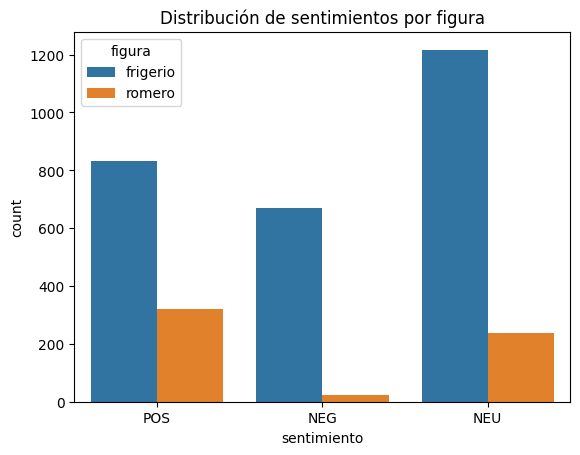

In [38]:
# Validación de algunos sentimientos por candidatos

print("Sentimientos de Frigerio: \n")
for clase in ['POS', 'NEG', 'NEU']:
    print(f"\n Ejemplos {clase} - Frigerio")
    ejemplos = df_sentimientos[(df_sentimientos['figura'] == 'frigerio') & (df_sentimientos['sentimiento'] == clase)].sample(3, random_state=42)
    for _, row in ejemplos.iterrows():
        print(f" {row['parrafo'][:200]}... ({row['probabilidad']})\n")

print("Sentimientos de Romero: \n")
for clase in ['POS', 'NEG', 'NEU']:
    print(f"\n Ejemplos {clase} - Romero")
    ejemplos = df_sentimientos[(df_sentimientos['figura'] == 'romero') & (df_sentimientos['sentimiento'] == clase)].sample(3, random_state=42)
    for _, row in ejemplos.iterrows():
        print(f" {row['parrafo'][:200]}... ({row['probabilidad']})\n")

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_sentimientos, x='sentimiento', hue='figura')
plt.title("Distribución de sentimientos por figura")
plt.show()

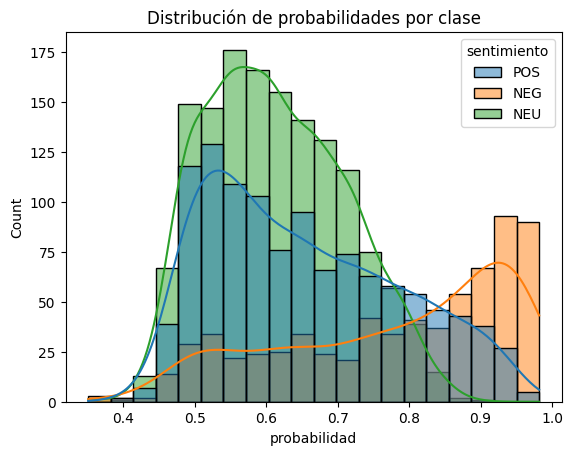

In [39]:
# Variabilidad de la probabilidad de pertenencia
sns.histplot(data=df_sentimientos, x='probabilidad', hue='sentimiento', bins=20, kde=True)
plt.title("Distribución de probabilidades por clase")
plt.show()

### Frecuencias de palabras y nube semántica

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14628\1847327638.py:95: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("frecuencia", ascending=False).head(10))


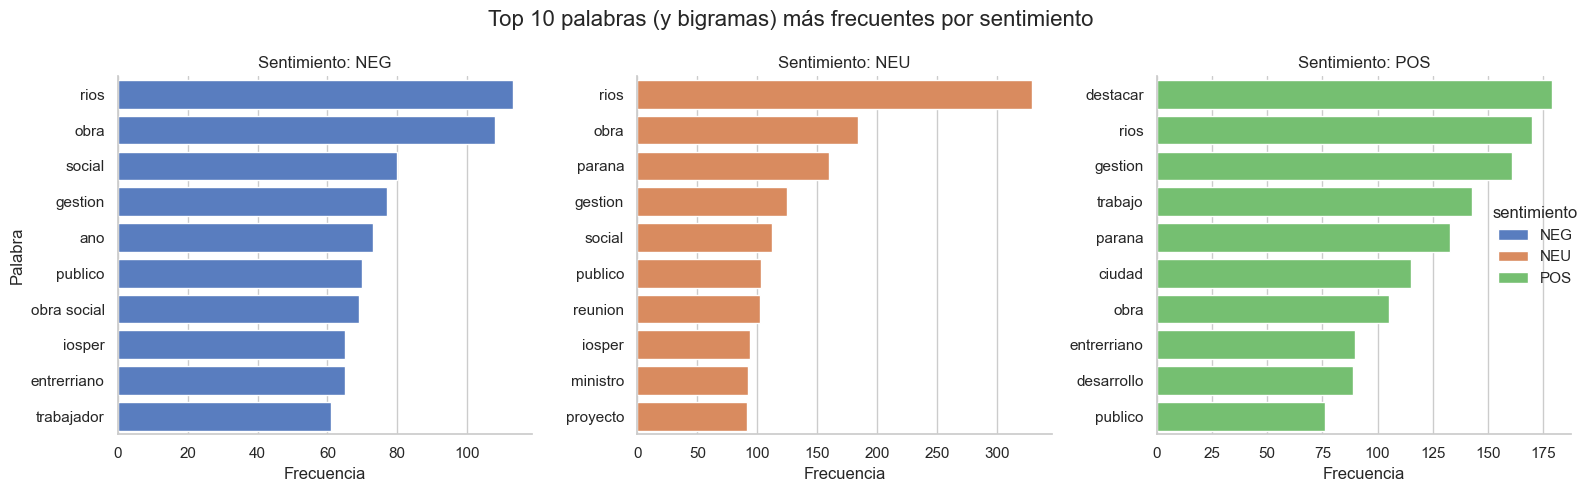

In [48]:
import spacy
import unicodedata
import re
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Cargar modelo spaCy
nlp = spacy.load("es_core_news_sm")
stopwords = nlp.Defaults.stop_words

# --- Palabras a excluir (normalizadas)
excluir_raw = [
    'frigerio', 'rogeli', 'romero', 'rosario', 'rogelio',
    'gobernador', 'intendente', 'intendentea', 'intendenta', 'gobierno',
    'provincia', 'provincial', 'nacional', 'milei'
]

def normalizar_palabra(palabra):
    return ''.join(
        c for c in unicodedata.normalize('NFD', palabra)
        if unicodedata.category(c) != 'Mn'
    ).lower()

excluir = set([normalizar_palabra(w) for w in excluir_raw])

# --- Procesamiento de texto + bigramas
def procesar_texto_y_bigrams(texto):
    doc = nlp(texto)
    palabras_limpias = []
    bigramas_limpios = []

    tokens_originales = []

    for token in doc:
        if not token.is_alpha:
            continue

        palabra = token.lemma_.lower()

        if len(palabra) < 3 or len(palabra) > 20 or re.search(r'\d', palabra):
            palabra = token.text.lower()

        palabra = normalizar_palabra(palabra)
        tokens_originales.append(palabra)

    # Construir bigramas ANTES de filtrar
    bigramas = [f"{a} {b}" for a, b in zip(tokens_originales, tokens_originales[1:])]

    # Filtrar palabras limpias
    for palabra in tokens_originales:
        if palabra in stopwords or palabra in excluir or len(palabra) < 3:
            continue
        if palabra.endswith("ento") and palabra not in {"aumento", "sustento", "fundamento"}:
            continue
        palabras_limpias.append(palabra)

    # Filtrar bigramas seguros (solo si tienen exactamente dos palabras válidas)
    for bigrama in bigramas:
        partes = bigrama.split()
        if len(partes) == 2:
            w1, w2 = partes
            if (
                w1 not in stopwords and w2 not in stopwords and
                w1 not in excluir and w2 not in excluir
            ):
                bigramas_limpios.append(bigrama)

    return palabras_limpias + bigramas_limpios

# --- Contar frecuencias
def contar_frecuencias(df):
    registros = []
    for sentimiento in df['sentimiento'].unique():
        subset = df[df['sentimiento'] == sentimiento]
        tokens = []
        for texto in subset['parrafo']:
            tokens.extend(procesar_texto_y_bigrams(texto))
        counter = Counter(tokens)
        for palabra, freq in counter.items():
            registros.append({
                'palabra': palabra,
                'sentimiento': sentimiento,
                'frecuencia': freq
            })
    return pd.DataFrame(registros)

# --- Ejecutar con tus datos (df_sentimientos)
frecuencias_df = contar_frecuencias(df_sentimientos)

# --- Gráfico de palabras más frecuentes
top_palabras = (
    frecuencias_df.groupby("sentimiento", group_keys=False)
    .apply(lambda x: x.sort_values("frecuencia", ascending=False).head(10))
)

sns.set(style="whitegrid")
g = sns.catplot(
    data=top_palabras,
    x="frecuencia",
    y="palabra",
    hue="sentimiento",
    col="sentimiento",
    kind="bar",
    height=5,
    aspect=1,
    sharex=False,
    sharey=False,
    palette="muted"
)

g.set_titles("Sentimiento: {col_name}")
g.set_axis_labels("Frecuencia", "Palabra")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Top 10 palabras (y bigramas) más frecuentes por sentimiento", fontsize=16)

plt.tight_layout()
plt.show()


In [64]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# --- Modelo multilingüe liviano ---
model = SentenceTransformer('distiluse-base-multilingual-cased-v2')

# --- Configuraciones ---
TOP_N = 100              # Cantidad de palabras más frecuentes por sentimiento
UMBRAL_SIM = 0.15        # Umbral mínimo de similitud para crear aristas
SENTIMIENTO_FILTRADO = 'positivo'  # Cambiar a 'negativo' o 'neutro' para visualizar

# --- Almacenamiento de aristas ---
grafo_rows = []

# --- Bucle principal por sentimiento ---
for sentimiento in frecuencias_df['sentimiento'].unique():
    subset = frecuencias_df[frecuencias_df['sentimiento'] == sentimiento]

    # Seleccionar top N palabras por frecuencia
    top_palabras = (
        subset.sort_values("frecuencia", ascending=False)
        .head(TOP_N)['palabra']
        .dropna()
        .astype(str)
        .tolist()
    )

    print(f"\n🧪 {sentimiento.upper()} – Cantidad de palabras: {len(top_palabras)}")
    print("Ejemplos:", top_palabras[:10])

    if len(top_palabras) < 2:
        print("⚠️ No hay suficientes palabras para generar aristas.")
        continue

    # Generar embeddings (sin convert_to_tensor)
    embeddings = model.encode(top_palabras)
    print("Embeddings shape:", embeddings.shape)

    # Calcular similitudes y construir aristas
    sims = cosine_similarity(embeddings)
    conteo_aristas = 0

    for i in range(len(top_palabras)):
        for j in range(i + 1, len(top_palabras)):
            sim = sims[i, j]
            if sim > UMBRAL_SIM:
                grafo_rows.append({
                    'palabra_1': top_palabras[i],
                    'palabra_2': top_palabras[j],
                    'peso': round(sim, 3),
                    'sentimiento': sentimiento
                })
                conteo_aristas += 1

    print(f"🔍 {sentimiento} → {conteo_aristas} aristas generadas.")

# --- Crear DataFrame con todas las relaciones ---
grafo_df = pd.DataFrame(grafo_rows)

# --- Visualización del grafo para un sentimiento específico ---
grafo_sent = grafo_df[grafo_df['sentimiento'] == SENTIMIENTO_FILTRADO]

# Crear grafo si hay datos
G = nx.Graph()
for _, row in grafo_sent.iterrows():
    G.add_edge(row['palabra_1'], row['palabra_2'], weight=row['peso'])

if G.number_of_nodes() > 0:
    pos = nx.spring_layout(G, seed=42)

    plt.figure(figsize=(12, 10))
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')
    nx.draw_networkx_edges(G, pos, width=1)
    nx.draw_networkx_labels(G, pos, font_size=10)

    plt.title(f"Grafo semántico para sentimiento: {SENTIMIENTO_FILTRADO}")
    plt.axis('off')
    plt.show()
else:
    print(f"⚠️ Grafo vacío para sentimiento '{SENTIMIENTO_FILTRADO}'. No se visualiza.")



🧪 POS – Cantidad de palabras: 100
Ejemplos: ['destacar', 'rios', 'gestion', 'trabajo', 'parana', 'ciudad', 'obra', 'entrerriano', 'desarrollo', 'publico']
Embeddings shape: (100, 512)
🔍 POS → 4949 aristas generadas.

🧪 NEG – Cantidad de palabras: 100
Ejemplos: ['rios', 'obra', 'social', 'gestion', 'ano', 'publico', 'obra social', 'iosper', 'entrerriano', 'trabajador']
Embeddings shape: (100, 512)
🔍 NEG → 4949 aristas generadas.

🧪 NEU – Cantidad de palabras: 100
Ejemplos: ['rios', 'obra', 'parana', 'gestion', 'social', 'publico', 'reunion', 'iosper', 'ministro', 'proyecto']
Embeddings shape: (100, 512)
🔍 NEU → 4950 aristas generadas.
⚠️ Grafo vacío para sentimiento 'positivo'. No se visualiza.
